In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

# Table Construction - Origin and Destination

In [4]:
df = pd.read_csv("link_weight_2017.csv")

In [5]:
df.head()

,O_City,D_City,Modality,No_carrier,departure_per_week,avg_travel_time,link_weight,o_city_lat,o_city_lon,d_city_lat,d_city_lon
0,Aalborg,Aarhus,Sea,1,1,6.0,1,NaN,NaN,NaN,NaN
1,Aalborg,Bremerhaven,Sea,1,2,3.5,2,NaN,NaN,53.552226,8.586551
2,Aalborg,Copenhagen,Sea,1,1,6.0,1,NaN,NaN,55.686724,12.570072
3,Aalborg,Fredericia,Sea,1,1,7.0,1,NaN,NaN,NaN,NaN
4,Aalborg,Göteborg,Sea,1,1,1.0,1,NaN,NaN,57.707233,11.967017


In [6]:
hubs = ['Rotterdam',
 'Antwerp',
 'Hamburg',
 'Bremerhaven',
 'Valencia',
 'Piraeus',
 'Algeciras',
 'Felixstowe',
 'Barcelona',
 'Marsaxlokk',
 'Le_Havre',
 'Southampton']

In [7]:
df_origin = df[(df['O_City'] == 'Rotterdam') | (df['O_City'] == 'Antwerp') | (df['O_City'] == 'Hamburg')|
              (df['O_City'] == 'Bremerhaven') | (df['O_City'] == 'Valencia') | (df['O_City'] == 'Piraeus')|
              (df['O_City'] == 'Algeciras') | (df['O_City'] == 'Felixstowe') | (df['O_City'] == 'Barcelona')|
              (df['O_City'] == 'Marsaxlokk') | (df['O_City'] == 'Le Havre') | (df['O_City'] == 'Southampton')]

In [8]:
df_destination = df[(df['D_City'] == 'Rotterdam') | (df['D_City'] == 'Antwerp') | (df['D_City'] == 'Hamburg')|
              (df['D_City'] == 'Bremerhaven') | (df['D_City'] == 'Valencia') | (df['D_City'] == 'Piraeus')|
              (df['D_City'] == 'Algeciras') | (df['D_City'] == 'Felixstowe') | (df['D_City'] == 'Barcelona')|
              (df['D_City'] == 'Marsaxlokk') | (df['D_City'] == 'Le Havre') | (df['D_City'] == 'Southampton')]

# Merge Table

In [9]:
df_all = pd.concat([df_origin, df_destination])

In [10]:
df_all.head()

,O_City,D_City,Modality,No_carrier,departure_per_week,avg_travel_time,link_weight,o_city_lat,o_city_lon,d_city_lat,d_city_lon
198,Algeciras,Abidjan,Sea,1,2,12.500000,2,36.1408,5.4562,NaN,NaN
199,Algeciras,Agadir,Sea,3,12,8.333333,12,36.1408,5.4562,NaN,NaN
200,Algeciras,Alexandria,Sea,3,5,14.200000,5,36.1408,5.4562,NaN,NaN
201,Algeciras,Algiers,Sea,1,1,3.000000,1,36.1408,5.4562,NaN,NaN
202,Algeciras,Aliaga,Sea,1,1,8.000000,1,36.1408,5.4562,NaN,NaN


In [11]:
df_all.dropna(inplace=True)

In [12]:
# reset index
df_all.reset_index(drop=True, inplace=True)

# Make the file for Muxviz

In [13]:
# Make Node List
origin_list = list(set(df_all["O_City"]))
destination_list = list(set(df_all["D_City"]))

# Sorting origin and destination
origin_list.sort()
destination_list.sort()

# Create a full list
full_node = origin_list + destination_list

# Set the full node
full_node = set(full_node)

full_node = list(full_node)
full_node.sort()

dict_node = {x+1:full_node[x] for x in range(len(full_node))}

# Make dataframe for the node
df_node = pd.DataFrame(list(dict_node.items()), columns=['nodeID','nodeLabel'])

df_node.index += 1
df_node.index.rename("nodeID", inplace = True)
df_node.drop("nodeID", axis=1, inplace= True)
df_node.replace(to_replace = r" ", value = "_", regex=True, inplace=True)
df_node.to_csv("terminal_layout_2017.txt",sep=" ")

In [14]:
# Algorithm terminal layout 2 for saving the latitude and longitude value to be called when making dataframe
dict_loc_origin = {df_all['O_City'][x]:(df_all['o_city_lat'][x], df_all['o_city_lon'][x]) for x in range(len(df_all))}
dict_loc_destination = {df_all['D_City'][x]:(df_all['d_city_lat'][x], df_all['d_city_lon'][x]) for x in range(len(df_all))}

In [15]:
max_loc_length = max(len(dict_loc_origin), len(dict_loc_destination))

In [16]:
# Check whether set of element in destination is part of origin
set(dict_loc_destination.keys()) < set(dict_loc_origin.keys())

True

In [17]:
# Make set of items to be called
origin_loc_list = sorted(list(set(df_all["O_City"])))

In [18]:
df_loc_all = pd.DataFrame(columns=['nodeLabel','nodeLat','nodeLong'], index=range(len(dict_loc_origin)))

In [19]:
for i in range(len(dict_loc_origin)):
    df_loc_all['nodeLabel'][i] = origin_loc_list[i]
    df_loc_all['nodeLat'][i] = dict_loc_origin[origin_loc_list[i]][0]
    df_loc_all['nodeLong'][i] = dict_loc_origin[origin_loc_list[i]][1]

In [20]:
# remove nan
df_loc_all.dropna(inplace=True)
df_loc_all.reset_index(drop=True,inplace=True)
df_loc_all.index += 1
df_loc_all.index.rename("nodeID", inplace = True)
df_loc_all.replace(to_replace = r" ", value = "_", regex=True, inplace=True)
df_loc_all.to_csv("terminal_loc_layout_2017.txt",sep=" ")

In [21]:
# New algorithm - make terminal layout and other 3 layers by using df_loc_all

In [22]:
# for getting the ID of the node
dict_loc_node = {df_loc_all['nodeLabel'].values[x]:x+1 for x in range(len(df_loc_all))}

In [23]:
df_all.head()

,O_City,D_City,Modality,No_carrier,departure_per_week,avg_travel_time,link_weight,o_city_lat,o_city_lon,d_city_lat,d_city_lon
0,Algeciras,Antwerp,Sea,4,7,6.285714,7,36.1408,5.4562,51.221110,4.399708
1,Algeciras,Barcelona,Sea,3,10,6.500000,10,36.1408,5.4562,41.382894,2.177432
2,Algeciras,Bilbao,Sea,2,4,5.000000,4,36.1408,5.4562,43.263005,-2.934992
3,Algeciras,Bremerhaven,Sea,1,1,9.000000,1,36.1408,5.4562,53.552226,8.586551
4,Algeciras,Catania,Sea,2,2,7.000000,2,36.1408,5.4562,37.502235,15.087380


In [24]:
# Separating the layer based on modality
set(df_all['Modality'].values)

# df inland
df_loc_inland = df_all[df_all['Modality'] == 'Inland shipping']

# drop na
df_loc_inland.dropna(inplace=True)

# reset index
df_loc_inland.reset_index(drop=True, inplace=True)

# df inland
df_loc_inland_cut = df_loc_inland.iloc[:,:7]
df_loc_inland_cut.drop(labels=['Modality','No_carrier','departure_per_week','avg_travel_time'], axis=1, inplace=True)
df_loc_inland_cut["O_City"] = df_loc_inland_cut["O_City"].map(dict_loc_node)
df_loc_inland_cut["D_City"] = df_loc_inland_cut["D_City"].map(dict_loc_node)
df_loc_inland_cut.dropna(inplace=True)
# map into integer
df_loc_inland_cut["O_City"] = df_loc_inland_cut["O_City"].map(int)
df_loc_inland_cut["D_City"] = df_loc_inland_cut["D_City"].map(int)

/Users/andreas.yunus/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [25]:
# Rail
# df rail
df_loc_rail = df_all[df_all['Modality'] == 'Rail']

# drop na
df_loc_rail.dropna(inplace=True)

# reset index
df_loc_rail.reset_index(drop=True, inplace=True)

# df rail
df_loc_rail_cut = df_loc_rail.iloc[:,:7]
df_loc_rail_cut.drop(labels=['Modality','No_carrier','departure_per_week','avg_travel_time'], axis=1, inplace=True)
df_loc_rail_cut["O_City"] = df_loc_rail_cut["O_City"].map(dict_loc_node)
df_loc_rail_cut["D_City"] = df_loc_rail_cut["D_City"].map(dict_loc_node)
df_loc_rail_cut.dropna(inplace=True)
# map into integer
df_loc_rail_cut["O_City"] = df_loc_rail_cut["O_City"].map(int)
df_loc_rail_cut["D_City"] = df_loc_rail_cut["D_City"].map(int)

/Users/andreas.yunus/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [26]:
# Sea
# df sea
df_loc_sea = df_all[df_all['Modality'] == 'Sea']

# drop na
df_loc_sea.dropna(inplace=True)

# reset index
df_loc_sea.reset_index(drop=True, inplace=True)

# df sea
df_loc_sea_cut = df_loc_sea.iloc[:,:7]
df_loc_sea_cut.drop(labels=['Modality','No_carrier','departure_per_week','avg_travel_time'], axis=1, inplace=True)
df_loc_sea_cut["O_City"] = df_loc_sea_cut["O_City"].map(dict_loc_node)
df_loc_sea_cut["D_City"] = df_loc_sea_cut["D_City"].map(dict_loc_node)
df_loc_sea_cut.dropna(inplace=True)
df_loc_sea_cut["O_City"] = df_loc_sea_cut["O_City"].map(int)
df_loc_sea_cut["D_City"] = df_loc_sea_cut["D_City"].map(int)

/Users/andreas.yunus/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [27]:
# Make layer for inland
# Add weight column
#df_loc_inland_cut["link_weight"] = 1
df_loc_inland_cut.to_csv("terminal_loc_inland_2017.txt", sep=" ", index=False, header=False)

# Make layer for rail
# Add weight column
#df_loc_rail_cut["link_weight"] = 1
df_loc_rail_cut.to_csv("terminal_loc_rail_2017.txt", sep=" ", index=False, header=False)

# Make layer for sea
# Add weight column
#df_loc_sea_cut["link_weight"] = 1
df_loc_sea_cut.to_csv("terminal_loc_sea_2017.txt", sep=" ", index=False, header=False)

In [28]:
# batasan

In [29]:
'''
# Inverse the dictionary
# Invert the dictionary to call the nodeID based on the name only
inv_dict_node = {v: k for k, v in dict_node.items()}
''';

In [30]:
'''
# Separating the layer based on modality
set(df_all['Modality'].values)

# df inland
df_inland = df_all[df_all['Modality'] == 'Inland shipping']
df_inland.reset_index(drop=True, inplace=True)

# df rail
df_rail = df_all[df_all['Modality'] == 'Rail']
df_rail.reset_index(drop=True, inplace=True)

# df sea
df_sea = df_all[df_all['Modality'] == 'Sea']
df_sea.reset_index(drop=True, inplace=True)

# df inland
df_inland_cut = df_inland.iloc[:,:7]
df_inland_cut.drop(labels=["O_Country_ID", "O_Country", "O_Terminal", "D_Country_ID", "D_Country"], axis=1, inplace=True)
df_inland_cut["O_City"] = df_inland_cut["O_City"].map(inv_dict_node)
df_inland_cut["D_City"] = df_inland_cut["D_City"].map(inv_dict_node)

# df rail
df_rail_cut = df_rail.iloc[:,:7]
df_rail_cut.drop(labels=["O_Country_ID", "O_Country", "O_Terminal", "D_Country_ID", "D_Country"], axis=1, inplace=True)
df_rail_cut["O_City"] = df_rail_cut["O_City"].map(inv_dict_node)
df_rail_cut["D_City"] = df_rail_cut["D_City"].map(inv_dict_node)

# df sea
df_sea_cut = df_sea.iloc[:,:7]
df_sea_cut.drop(labels=["O_Country_ID", "O_Country", "O_Terminal", "D_Country_ID", "D_Country"], axis=1, inplace=True)
df_sea_cut["O_City"] = df_sea_cut["O_City"].map(inv_dict_node)
df_sea_cut["D_City"] = df_sea_cut["D_City"].map(inv_dict_node)

# Same city to same city - maybe different terminal
df_sea_cut[df_sea_cut["O_City"] == df_sea_cut["D_City"]]
''';

In [31]:
'''
# Make layer for inland
# Add weight column
df_inland_cut["link_weight"] = 1
df_inland_cut.to_csv("terminal_inland.txt", sep=" ", index=False, header=False)

# Make layer for rail
# Add weight column
df_rail_cut["link_weight"] = 1
df_rail_cut.to_csv("terminal_rail.txt", sep=" ", index=False, header=False)

# Make layer for sea
# Add weight column
df_sea_cut["link_weight"] = 1
df_sea_cut.to_csv("terminal_sea.txt", sep=" ", index=False, header=False)
''';

# Map distribution of the Link Weight

In [32]:
df_all.head()

,O_City,D_City,Modality,No_carrier,departure_per_week,avg_travel_time,link_weight,o_city_lat,o_city_lon,d_city_lat,d_city_lon
0,Algeciras,Antwerp,Sea,4,7,6.285714,7,36.1408,5.4562,51.221110,4.399708
1,Algeciras,Barcelona,Sea,3,10,6.500000,10,36.1408,5.4562,41.382894,2.177432
2,Algeciras,Bilbao,Sea,2,4,5.000000,4,36.1408,5.4562,43.263005,-2.934992
3,Algeciras,Bremerhaven,Sea,1,1,9.000000,1,36.1408,5.4562,53.552226,8.586551
4,Algeciras,Catania,Sea,2,2,7.000000,2,36.1408,5.4562,37.502235,15.087380


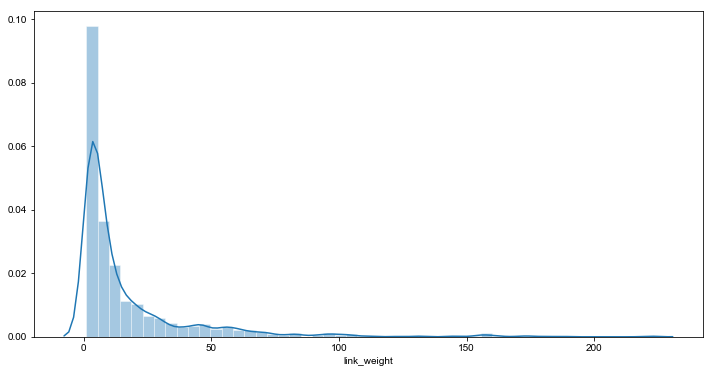

In [33]:
fig, ax = plt.subplots(figsize=(12,6))
sns.set_style("darkgrid")
sns.distplot(df_all["link_weight"], ax=ax)

In [34]:
df_all['link_weight'].median()

7.0

In [35]:
df_all['link_weight'].mean()

17.06984553391538